In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

### Merge data from each month into one CSV

In [2]:
files = [file for file in os.listdir("./Data/SalesData")]
for file in files:
    print(file)

Sales01_January_2019.csv
Sales02_February_2019.csv
Sales03_March_2019.csv
Sales04_April_2019.csv
Sales05_May_2019.csv
Sales06_June_2019.csv
Sales07_July_2019.csv
Sales08_August_2019.csv
Sales09_September_2019.csv
Sales10_October_2019.csv
Sales11_November_2019.csv
Sales12_December_2019.csv


In [3]:
# first creating empty dataframe
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Data/SalesData/"+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


### Clean up data

In [5]:
# finding how many rows with nan data
nan_df = all_months_data[all_months_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
nan_df.shape

(545, 6)

In [7]:
all_months_data.shape

(186850, 6)

In [8]:
# Droping all rows of NAN
all_months_data = all_months_data.dropna(how='all')
all_months_data.shape

(186305, 6)

In [9]:
# as we merged multiple filees, all files headers are also included in dataframe  
temp_df = all_months_data[all_months_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
temp_df.shape

(355, 6)

In [11]:
# creating new datarame excluding all files headers
df1 = all_months_data[all_months_data['Order Date'].str[0:2] != 'Or']
df1.shape

(185950, 6)

In [12]:
# no files headers so our data is clean
temp_df1 = df1[df1['Order Date'].str[0:2] == 'Or']
temp_df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


### changing column datatypes

In [14]:
df1.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [15]:
df1 = df1.astype({"Order ID": "int64"})
df1 = df1.astype({"Quantity Ordered": "int64"})
df1 = df1.astype({"Price Each": "float"})

### Adding columns

In [16]:
# adding month column
df1['Month'] = df1['Order Date'].str[0:2]
df1.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
dtype: object

In [17]:
df1.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [18]:
# column reindexing
df1 = df1.reindex(columns=['Order ID','Product','Quantity Ordered','Price Each','Order Date','Month','Purchase Address'])
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Purchase Address
0,141234,iPhone,1,700.00,01/22/19 21:25,01,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,01,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,01,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,01,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,01,"387 10th St, Austin, TX 73301"


In [19]:
df2 = df1.copy()
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Purchase Address
0,141234,iPhone,1,700.00,01/22/19 21:25,01,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,01,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,01,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,01,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,01,"387 10th St, Austin, TX 73301"


In [20]:
# inserting new column in specific index 6, Day is column name, df1['Order Date'].str[3:5] is value of new column
df2.insert(6,'Day',df1['Order Date'].str[3:5])

In [21]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Day,Purchase Address
0,141234,iPhone,1,700.00,01/22/19 21:25,01,22,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,01,28,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,01,17,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,01,05,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,01,25,"387 10th St, Austin, TX 73301"


In [22]:
df2 = df2.astype({"Month": "int64"})
df2 = df2.astype({"Day": "int64"})

In [23]:
df2.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Month                 int64
Day                   int64
Purchase Address     object
dtype: object

In [24]:
# adding sales column to df1
df1.insert(4,'Sales',df1['Quantity Ordered'] * df1['Price Each'])
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,01,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,01,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,01,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,01,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,01,"387 10th St, Austin, TX 73301"


In [25]:
df1.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Sales               float64
Order Date           object
Month                object
Purchase Address     object
dtype: object

### Data Exploration

In [26]:
# What was the best month for sales? How much was earned that month?
# all numeric data type returned
df1.groupby('Month').sum()

,Order ID,Quantity Ordered,Price Each,Sales
Month,,,,
01,1421630798,10903,1811768.38,1822256.73
02,1871052592,13449,2188884.72,2202022.42
03,2564810956,17005,2791207.83,2807100.38
04,3387347100,20558,3367671.02,3390670.24
05,3345871523,18667,3135125.13,3152606.75
06,2932976072,15253,2562025.61,2577802.26
07,3284139576,16072,2632539.56,2647775.76
08,2899373917,13448,2230345.42,2244467.88
09,2948726831,13109,2084992.09,2097560.13


In [27]:
df1.groupby('Month').sum()['Sales'].max()

4613443.34

In [28]:
# lowest sale
df1.groupby('Month').sum()['Sales'].min()

1822256.73

range(1, 13)


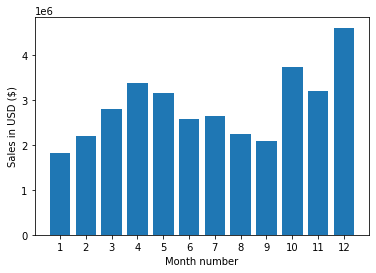

In [29]:
months = range(1,13)
print(months)
plt.bar(months,df1.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

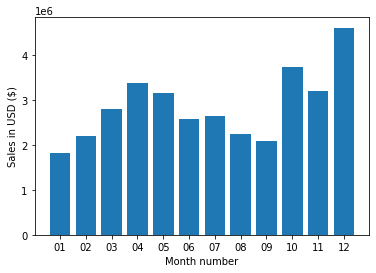

In [30]:
mon = df1['Month'].unique()
plt.bar(mon,df1.groupby(['Month']).sum()['Sales'])
plt.xticks(mon)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [31]:
mon = df1['Month'].unique()
mon

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [32]:
# first adding city column
# x.split(',')[1] means it will split after coma, [1] means it will take value from index 1 which is city name
df1.insert(7,'City',df1['Purchase Address'].apply(lambda x: x.split(',')[1]))
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,City,Purchase Address
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,01,Boston,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,01,Portland,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,01,San Francisco,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,01,Los Angeles,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,01,Austin,"387 10th St, Austin, TX 73301"


In [33]:
# adding state column, another way of using lambda
def get_state(addr):
    return addr.split(',')[2].split(' ')[1]
df1.insert(8,'StateName',df1['Purchase Address'].apply(lambda x: get_state(x)))
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,City,StateName,Purchase Address
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,01,Boston,MA,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,01,Portland,OR,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,01,San Francisco,CA,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,01,Los Angeles,CA,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,01,Austin,TX,"387 10th St, Austin, TX 73301"


In [34]:
df1.insert(10,'Zipcode',df1['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[2]))
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,City,StateName,Purchase Address,Zipcode
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,01,Boston,MA,"944 Walnut St, Boston, MA 02215",02215
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,01,Portland,OR,"185 Maple St, Portland, OR 97035",97035
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,01,San Francisco,CA,"538 Adams St, San Francisco, CA 94016",94016
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,01,Los Angeles,CA,"738 10th St, Los Angeles, CA 90001",90001
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,01,Austin,TX,"387 10th St, Austin, TX 73301",73301


In [35]:
def get_city(addr):
    return addr.split(',')[1]
def get_state(addr):
    return addr.split(',')[2].split(' ')[1]
#df1.insert(9,'City & State',df1['Purchase Address'].apply(lambda x: get_city(x)+' ('+get_state(x)+')'))
df1.insert(9,'City & State',df1['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})"))
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,City,StateName,City & State,Purchase Address,Zipcode
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,01,Boston,MA,Boston (MA),"944 Walnut St, Boston, MA 02215",02215
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,01,Portland,OR,Portland (OR),"185 Maple St, Portland, OR 97035",97035
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,01,San Francisco,CA,San Francisco (CA),"538 Adams St, San Francisco, CA 94016",94016
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,01,Los Angeles,CA,Los Angeles (CA),"738 10th St, Los Angeles, CA 90001",90001
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,01,Austin,TX,Austin (TX),"387 10th St, Austin, TX 73301",73301


In [36]:
#df1.drop(columns='City & State',inplace=True)
#df1.head()

In [37]:
# What city sold the most product?
df1.groupby('City & State').sum()

,Order ID,Quantity Ordered,Price Each,Sales
City & State,,,,
Atlanta (GA),3423838407,16602,2779908.20,2795498.58
Austin (TX),2280982185,11153,1809873.61,1819581.75
Boston (MA),4598265261,22528,3637409.77,3661642.01
Dallas (TX),3415643578,16730,2752627.82,2767975.40
Los Angeles (CA),6811084693,33289,5421435.23,5452570.80
New York City (NY),5736333884,27932,4635370.83,4664317.43
Portland (ME),563266345,2750,447189.25,449758.27
Portland (OR),2305594747,11303,1860558.22,1870732.34
San Francisco (CA),10304443952,50239,8211461.74,8262203.91


In [38]:
df1.groupby('City & State').sum()['Sales'].max()

8262203.91

In [50]:
cs = [city for city, i in df1.groupby(['City & State'])]
cs

[' Atlanta (GA)',
 ' Austin (TX)',
 ' Boston (MA)',
 ' Dallas (TX)',
 ' Los Angeles (CA)',
 ' New York City (NY)',
 ' Portland (ME)',
 ' Portland (OR)',
 ' San Francisco (CA)',
 ' Seattle (WA)']

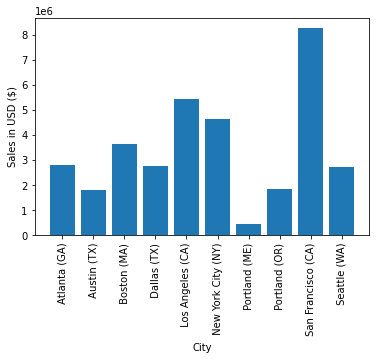

In [54]:
plt.bar(cs,df1.groupby(['City & State']).sum()['Sales'])
plt.xticks(cs,rotation='vertical', size=10)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

In [55]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,City,StateName,City & State,Purchase Address,Zipcode
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,01,Boston,MA,Boston (MA),"944 Walnut St, Boston, MA 02215",02215
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,01,Portland,OR,Portland (OR),"185 Maple St, Portland, OR 97035",97035
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,01,San Francisco,CA,San Francisco (CA),"538 Adams St, San Francisco, CA 94016",94016
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,01,Los Angeles,CA,Los Angeles (CA),"738 10th St, Los Angeles, CA 90001",90001
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,01,Austin,TX,Austin (TX),"387 10th St, Austin, TX 73301",73301


In [57]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,City,StateName,City & State,Purchase Address,Zipcode
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,01,Boston,MA,Boston (MA),"944 Walnut St, Boston, MA 02215",02215
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,01,Portland,OR,Portland (OR),"185 Maple St, Portland, OR 97035",97035
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,01,San Francisco,CA,San Francisco (CA),"538 Adams St, San Francisco, CA 94016",94016
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,01,Los Angeles,CA,Los Angeles (CA),"738 10th St, Los Angeles, CA 90001",90001
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,01,Austin,TX,Austin (TX),"387 10th St, Austin, TX 73301",73301


In [59]:
df1.insert(5,'Hour',df1['Order Date'].dt.hour)
df1.insert(5,'Minute',df1['Order Date'].dt.minute)
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Minute,Hour,Order Date,Month,City,StateName,City & State,Purchase Address,Zipcode
0,141234,iPhone,1,700.00,700.00,25,21,2019-01-22 21:25:00,01,Boston,MA,Boston (MA),"944 Walnut St, Boston, MA 02215",02215
1,141235,Lightning Charging Cable,1,14.95,14.95,15,14,2019-01-28 14:15:00,01,Portland,OR,Portland (OR),"185 Maple St, Portland, OR 97035",97035
2,141236,Wired Headphones,2,11.99,23.98,33,13,2019-01-17 13:33:00,01,San Francisco,CA,San Francisco (CA),"538 Adams St, San Francisco, CA 94016",94016
3,141237,27in FHD Monitor,1,149.99,149.99,33,20,2019-01-05 20:33:00,01,Los Angeles,CA,Los Angeles (CA),"738 10th St, Los Angeles, CA 90001",90001
4,141238,Wired Headphones,1,11.99,11.99,59,11,2019-01-25 11:59:00,01,Austin,TX,Austin (TX),"387 10th St, Austin, TX 73301",73301


In [60]:
df1.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Sales                      float64
Minute                       int64
Hour                         int64
Order Date          datetime64[ns]
Month                       object
City                        object
StateName                   object
City & State                object
Purchase Address            object
Zipcode                     object
dtype: object

In [70]:
# What time should we display advertisements to maximize likelihood of customer's buying product?
df1.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Minute,Order Date,Month,City,StateName,City & State,Purchase Address,Zipcode
Hour,,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [71]:
df1.groupby(['Hour']).count()['Sales'].max()

12905

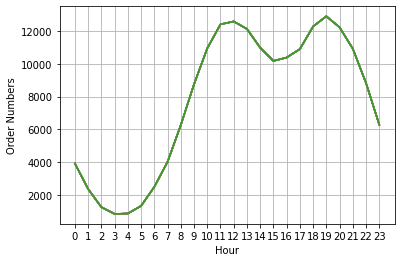

In [73]:
h = [hour for hour, i in df1.groupby(['Hour'])]
plt.plot(h, df1.groupby(['Hour']).count())
plt.xticks(h)
plt.ylabel('Order Numbers')
plt.xlabel('Hour')
plt.grid()
plt.show()

In [82]:
# What products are most often sold together?
df1['Order ID'].value_counts()

160873    5
312462    4
242936    4
235798    4
165665    4
         ..
201973    1
201974    1
201975    1
201976    1
319670    1
Name: Order ID, Length: 178437, dtype: int64

In [86]:
# shift+tab for help
df3 = df1[df1['Order ID'].duplicated(keep=False)]
df3.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Minute,Hour,Order Date,Month,City,StateName,City & State,Purchase Address,Zipcode
41,141275,USB-C Charging Cable,1,11.95,11.95,6,16,2019-01-07 16:06:00,01,Austin,TX,Austin (TX),"610 Walnut St, Austin, TX 73301",73301
42,141275,Wired Headphones,1,11.99,11.99,6,16,2019-01-07 16:06:00,01,Austin,TX,Austin (TX),"610 Walnut St, Austin, TX 73301",73301
57,141290,Apple Airpods Headphones,1,150.00,150.00,25,8,2019-01-02 08:25:00,01,Los Angeles,CA,Los Angeles (CA),"4 1st St, Los Angeles, CA 90001",90001
58,141290,AA Batteries (4-pack),3,3.84,11.52,25,8,2019-01-02 08:25:00,01,Los Angeles,CA,Los Angeles (CA),"4 1st St, Los Angeles, CA 90001",90001
133,141365,Vareebadd Phone,1,400.00,400.00,19,11,2019-01-10 11:19:00,01,New York City,NY,New York City (NY),"20 Dogwood St, New York City, NY 10001",10001


In [87]:
df3['Order ID'].value_counts()

160873    5
263918    4
289117    4
196615    4
304802    4
         ..
200595    2
200583    2
200575    2
200568    2
319631    2
Name: Order ID, Length: 7136, dtype: int64

In [89]:
df3.insert(14,'Groupby OrderID',df3.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)))
df3.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Minute,Hour,Order Date,Month,City,StateName,City & State,Purchase Address,Zipcode,Groupby OrderID
41,141275,USB-C Charging Cable,1,11.95,11.95,6,16,2019-01-07 16:06:00,01,Austin,TX,Austin (TX),"610 Walnut St, Austin, TX 73301",73301,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,6,16,2019-01-07 16:06:00,01,Austin,TX,Austin (TX),"610 Walnut St, Austin, TX 73301",73301,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,25,8,2019-01-02 08:25:00,01,Los Angeles,CA,Los Angeles (CA),"4 1st St, Los Angeles, CA 90001",90001,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,25,8,2019-01-02 08:25:00,01,Los Angeles,CA,Los Angeles (CA),"4 1st St, Los Angeles, CA 90001",90001,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,19,11,2019-01-10 11:19:00,01,New York City,NY,New York City (NY),"20 Dogwood St, New York City, NY 10001",10001,"Vareebadd Phone,Wired Headphones"


In [93]:
# dropping duplicate order id
df4 = df3[['Order ID','Groupby OrderID']].drop_duplicates()
df4

,Order ID,Groupby OrderID
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
24977,319536,"Macbook Pro Laptop,Wired Headphones"
24998,319556,"Google Phone,Wired Headphones"
25027,319584,"iPhone,Wired Headphones"
25040,319596,"iPhone,Lightning Charging Cable"


In [96]:
for row in df4['Groupby OrderID']:
    row_list = row.split(',')
    print(row_list)

['USB-C Charging Cable', 'Wired Headphones']
['Apple Airpods Headphones', 'AA Batteries (4-pack)']
['Vareebadd Phone', 'Wired Headphones']
['Google Phone', 'USB-C Charging Cable']
['Google Phone', 'Bose SoundSport Headphones']
['iPhone', 'Apple Airpods Headphones']
['Google Phone', 'Apple Airpods Headphones']
['iPhone', 'Apple Airpods Headphones', 'Wired Headphones']
['USB-C Charging Cable', 'Apple Airpods Headphones']
['Lightning Charging Cable', 'Wired Headphones']
['iPhone', 'Lightning Charging Cable']
['27in FHD Monitor', 'Bose SoundSport Headphones']
['Google Phone', 'USB-C Charging Cable']
['iPhone', 'Wired Headphones']
['Google Phone', 'USB-C Charging Cable']
['AA Batteries (4-pack)', 'AAA Batteries (4-pack)']
['Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones']
['Google Phone', 'USB-C Charging Cable']
['Vareebadd Phone', 'Wired Headphones']
['34in Ultrawide Monitor', 'Lightning Charging Cable']
['USB-C Charging Cable', 'Wired Headphones']
['Lightning Charging Cable',

In [97]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter
count = Counter()

for row in df4['Groupby OrderID']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # group by 2 items
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [98]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [99]:
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [111]:
# What product sold the most? Why do you think it sold the most?
df1.groupby(['Product']).sum()

,Order ID,Quantity Ordered,Price Each,Sales,Minute,Hour
Product,,,,,,
20in Monitor,950889651,4129,451068.99,454148.71,122252,58764
27in 4K Gaming Monitor,1442588628,6244,2429637.70,2435097.56,184331,90916
27in FHD Monitor,1724223743,7550,1125974.93,1132424.50,219948,107540
34in Ultrawide Monitor,1418985948,6199,2348718.19,2355558.01,183480,89076
AA Batteries (4-pack),4744173938,27635,79015.68,106118.40,609039,298342
AAA Batteries (4-pack),4764959472,31017,61716.59,92740.83,612113,297332
Apple Airpods Headphones,3579120098,15661,2332350.00,2349150.00,455570,223304
Bose SoundSport Headphones,3071496156,13457,1332366.75,1345565.43,392603,192445
Flatscreen TV,1110943207,4819,1440000.00,1445700.00,142789,68815


In [105]:
df1.groupby(['Product']).sum()['Sales'].max()

8037600.0

In [106]:
df1.groupby(['Product']).sum()['Quantity Ordered'].max()

31017

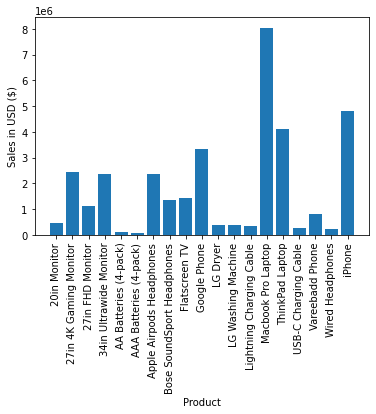

In [112]:
ps = [pr for pr, i in df1.groupby(['Product'])]
plt.bar(ps,df1.groupby(['Product']).sum()['Sales'])
plt.xticks(ps,rotation='vertical', size=10)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Product')
plt.show()

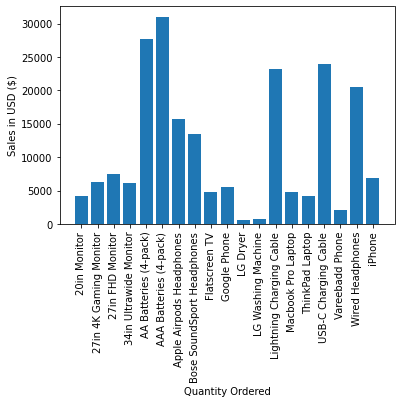

In [109]:
qs = [q for q, i in df1.groupby(['Product'])]
plt.bar(qs,df1.groupby(['Product']).sum()['Quantity Ordered'])
plt.xticks(qs,rotation='vertical', size=10)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Quantity Ordered')
plt.show()

In [115]:
prices = df1.groupby(['Product']).mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


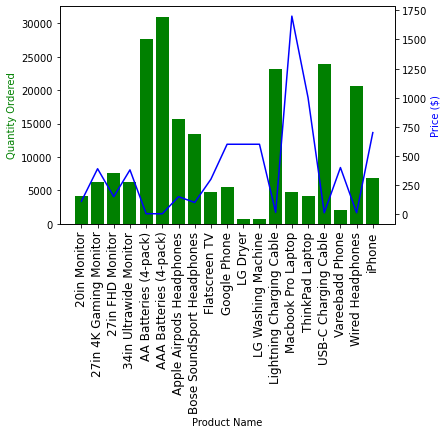

In [146]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # twinx() method creates double axes which share x-axis
ax1.bar(qs, df1.groupby(['Product']).sum()['Quantity Ordered'],color='g')
ax2.plot(qs, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
plt.xticks(qs)
ax1.set_xticklabels(qs, rotation='vertical', size=12)

plt.show()